<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Tarea2_GDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 2** (fecha de entrega: 24 de Julio 2021)


Esta tarea consistirá de tres preguntas las cuales deberá responder de forma completa (código, texto e imágenes explicativas). Puede entregar la tarea en el formato, que estime conveniente (doc, pdf, script de R, url de Colab) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Colab R (recordar dejar el notebook compartido).


En el taller 3 trabajamos con una base de datos de alumnos en el sistema de Educación Superior. La idea de esta tarea es ampliar el modelo de datos, entender como se relacionan las diferentes tablas y, extraer información relevante para generar insights importantes. 

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



##**Pregunta 1 (1 pt)**

En el taller se elaboró un modelo de datos Entidad - Relación con la matricula de Educación Superior. Complemente este modelo agregando la información del archivo "Rendimiento Escolar del año 2019".


La base de datos se encuentra disponible en http://datos.mineduc.cl/dashboards/19881/informacion-de-rendimiento-academico/.

**Tip 1:** Para elaborar el modelo, debe crear al menos una nueva entidad y  al menos una nueva relacion (junto con sus atributos), y ver como se relacionan con las creadas en el taller.

**Tip 2:** De acuerdo a lo que se vio en el taller, es necesario revisar el esquema de registro (http://datos.mineduc.cl/datasets/191683-er-rendimiento-por-alumno.download/).

**P.d:** Finalmente, en este link puede ver (más no editar) el modelo elaborado en el taller: https://app.creately.com/diagram/h6ZxbP2gf6D/edit

## Solucion

Expropiado a Hans Schlechter

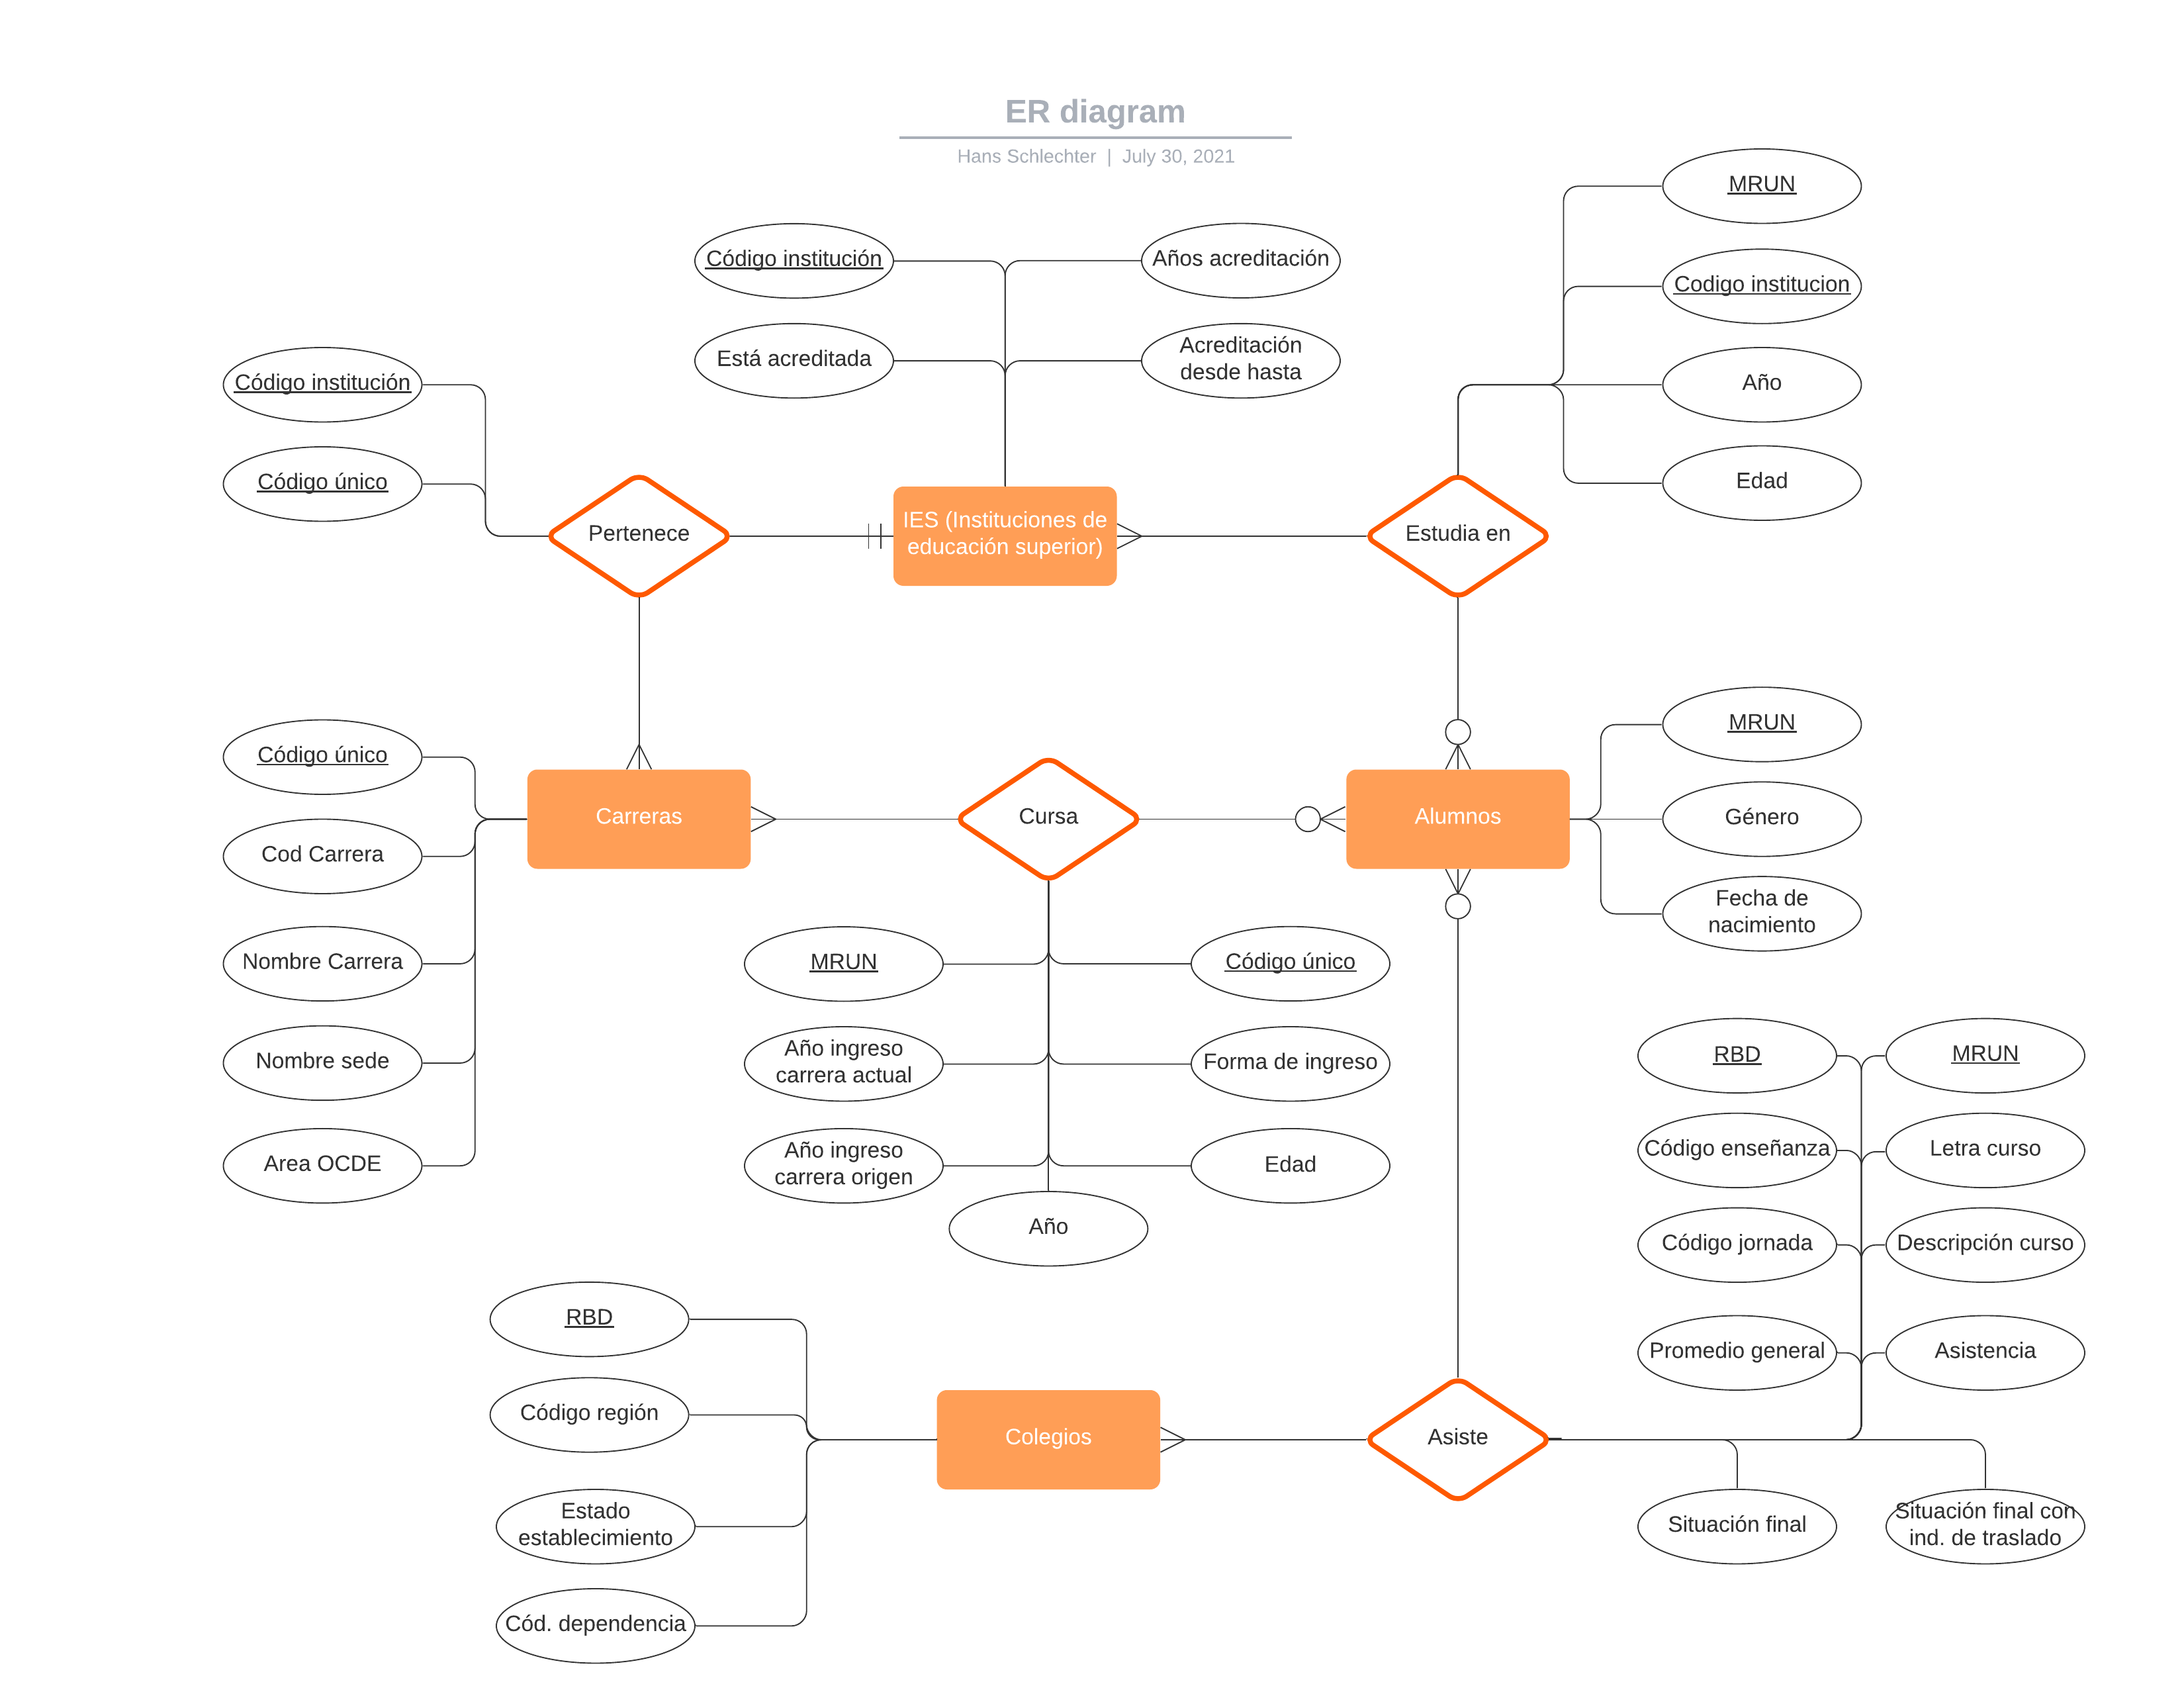

##**Pregunta 2 (2.5 pts)**

Haga un análisis de la calidad de datos de la tabla de Rendimiento 2019. Para ello, determine la completitud, consistencia y validez de sus datos. Si bien puede guiarse por el taller, analisis calcados (con los mismos atributos) del taller no serán considerados como validos

**a)** (1 pts) Calcule la completitud de: las tuplas, los atributos de la tabla y la tabla completa. Además señale aquellos atributos donde haya más errores y detallando en que casos la mayor presencia de datos faltantes es de una menor gravedad. Una vez hecho los calculos describa y presente graficos (de barra, histogramas) para facilitar la explicacion de los resultados.

**b)** (0.7 pts) Desarrolle un analisis de validez para:

*   Una restriccion de rango
*   Una restriccion de unicidad
*   Una restriccion de pertenencia con algun atributo que sea categorico (puede guiarse por el esquema del registro)

Para esto seleccione un atributo de la tabla para cada tipo de restricción, explique por qué eligió y explique sus resultados

**c)** (0.8 pts) Analice la consistencia de 3 atributos con respecto a otros de la misma tabla que entregan una informacion similar.

**Tip:** Puede compararlos de manera similar al taller.

In [ ]:
system("gdown --id 1Q-u8o9zYGNc6djZRrbnkz4YejSIitXHF")
unzip("/content/20200220_Rendimiento_2019_20200131_PUBL (1).zip")


In [ ]:
rendimiento_2019 <- read.csv2("20200220_Rendimiento_2019_20200131_PUBL.csv")

## a)
### Completitud filas

In [ ]:
rendimiento_2019 <- na_if(rendimiento_2019, " ")

In [ ]:
na_tuple <- rendimiento_2019 %>% summarize(v=row_number(),
                                NAcount=rowSums(is.na(rendimiento_2019)))

In [ ]:
NAcount_groups <- na_tuple %>% group_by(NAcount) %>%
      summarise(n=n()) %>%
      mutate(perc = n / sum(n) * 100)
NAcount_groups

NAcount,n,perc
<dbl>,<int>,<dbl>
0,3328008,99.97275389
1,423,0.01270684
2,484,0.01453927


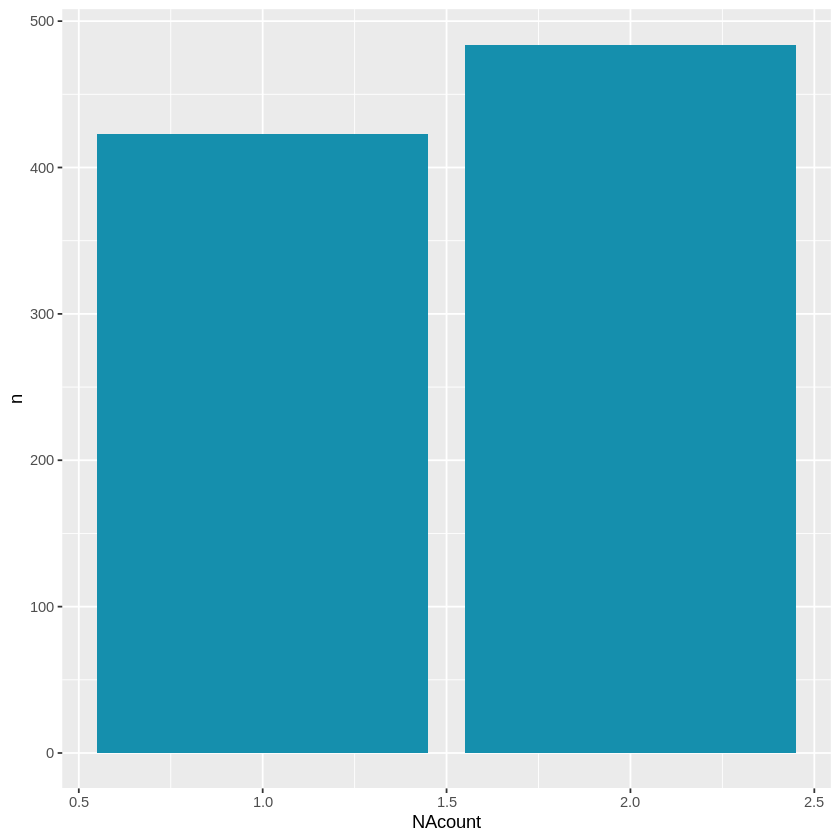

In [ ]:
NAcount_groups  %>% filter(NAcount>0)%>%
        ggplot(aes(x=NAcount, y=n)) + 
        geom_bar(stat = "identity",fill="#158FAD") 

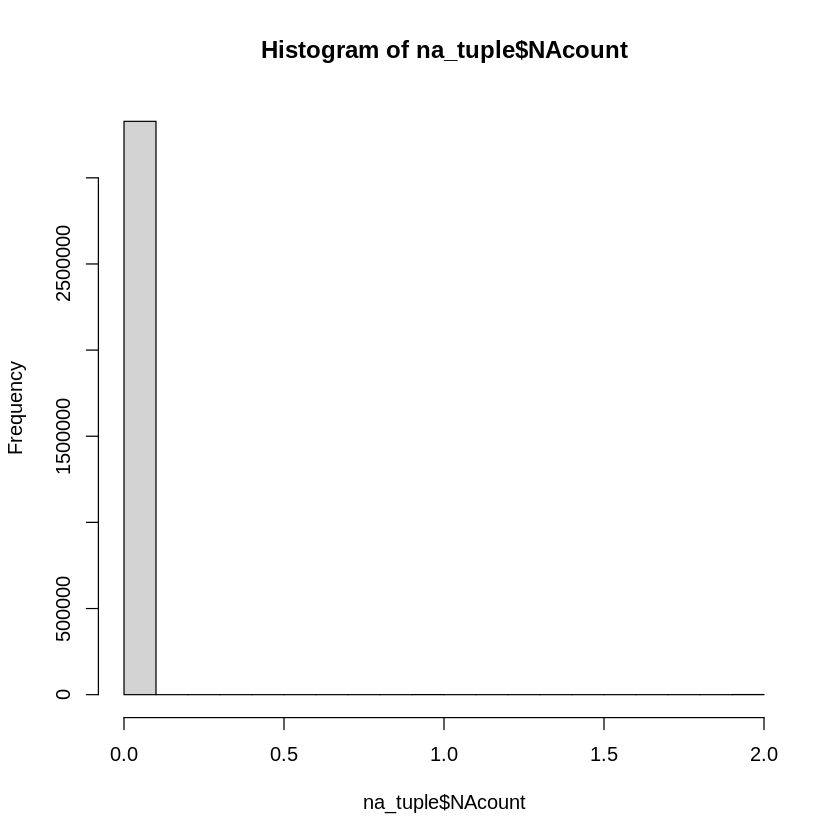

In [ ]:
hist(na_tuple$NAcount)

### Completitud columnas

In [ ]:
df <- apply(X = is.na(rendimiento_2019), MARGIN = 2, FUN = mean)
print(df*100)

          AGNO            RBD        DGV_RBD        NOM_RBD    COD_REG_RBD 
   0.000000000    0.000000000    0.000000000    0.000000000    0.000000000 
 NOM_REG_RBD_A    COD_PRO_RBD    COD_COM_RBD    NOM_COM_RBD COD_DEPROV_RBD 
   0.000000000    0.000000000    0.000000000    0.000000000    0.000000000 
NOM_DEPROV_RBD       COD_DEPE      COD_DEPE2      RURAL_RBD   ESTADO_ESTAB 
   0.000000000    0.000000000    0.000000000    0.000000000    0.000000000 
      COD_ENSE      COD_ENSE2      COD_GRADO        LET_CUR        COD_JOR 
   0.000000000    0.000000000    0.000000000    0.000000000    0.000000000 
   COD_TIP_CUR    COD_DES_CUR           MRUN        GEN_ALU    FEC_NAC_ALU 
   0.000000000    0.000000000    0.000000000    0.000000000    0.000000000 
      EDAD_ALU    COD_REG_ALU    COD_COM_ALU    NOM_COM_ALU       COD_RAMA 
   0.008140791    0.000000000    0.000000000    0.005647486    0.000000000 
       COD_SEC       COD_ESPE      PROM_GRAL     ASISTENCIA        SIT_FIN 
   0.0000000

#### Con Tidyverse

In [ ]:
na_column <- rendimiento_2019 %>% 
              select(everything()) %>% 
              summarise_all(funs(100*mean(is.na(.))))%>%
              t()%>%
              as.data.frame()


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [ ]:
na_column

,V1
,<dbl>
AGNO,0.000000000
RBD,0.000000000
DGV_RBD,0.000000000
NOM_RBD,0.000000000
COD_REG_RBD,0.000000000
NOM_REG_RBD_A,0.000000000
COD_PRO_RBD,0.000000000
COD_COM_RBD,0.000000000
NOM_COM_RBD,0.000000000


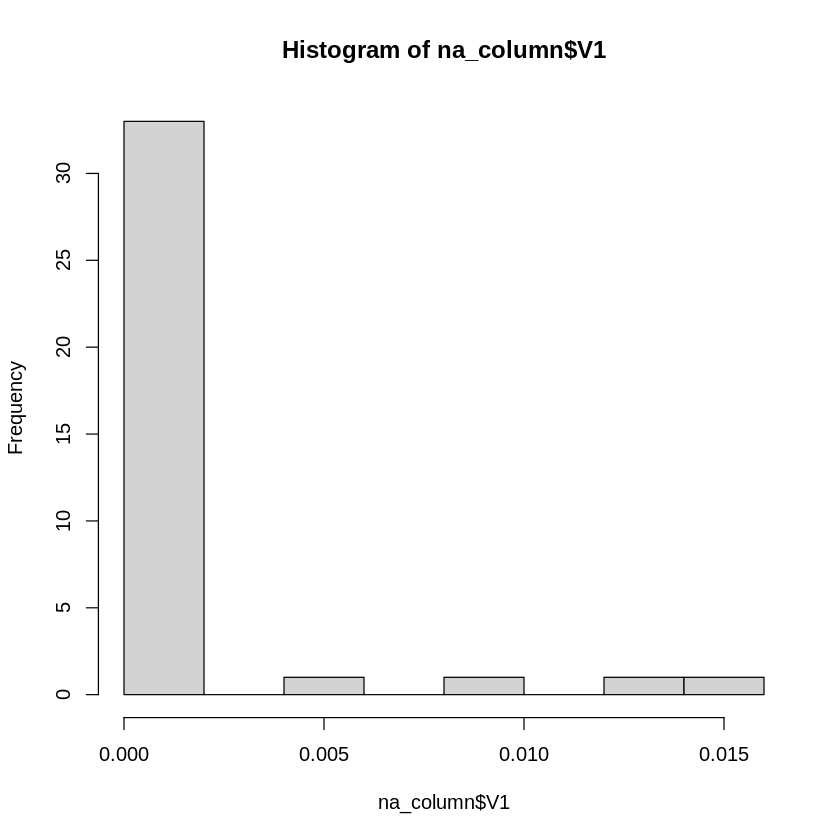

In [ ]:
hist(na_column$V1)

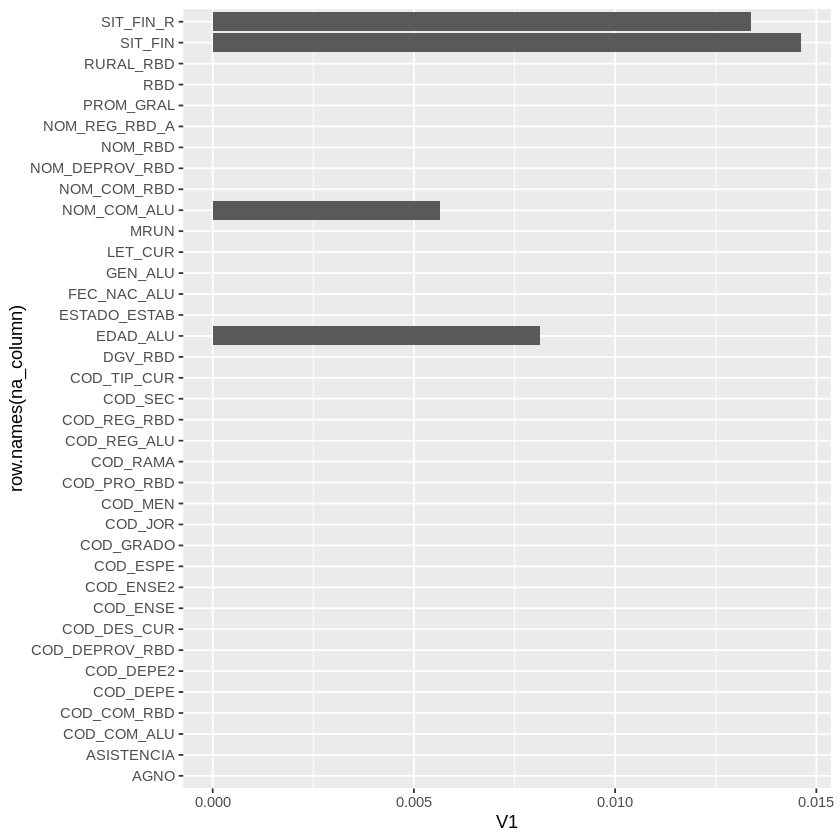

In [ ]:
ggplot(na_column, aes(x=row.names(na_column), y=V1)) + 
  geom_bar(stat = "identity")+
  coord_flip()

### Completitud tabla

In [ ]:
rendimiento_2019 %>% summarize(NAcount=rowSums(is.na(rendimiento_2019)))%>%
                     sum()/nrow(rendimiento_2019)/ncol(rendimiento_2019)*100

[1] 0.001129335

##b)

### Rango: 
Asistencia entre 0 y 100

In [ ]:
rendimiento_2019%>% filter(ASISTENCIA>100| ASISTENCIA<0)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,⋯,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>


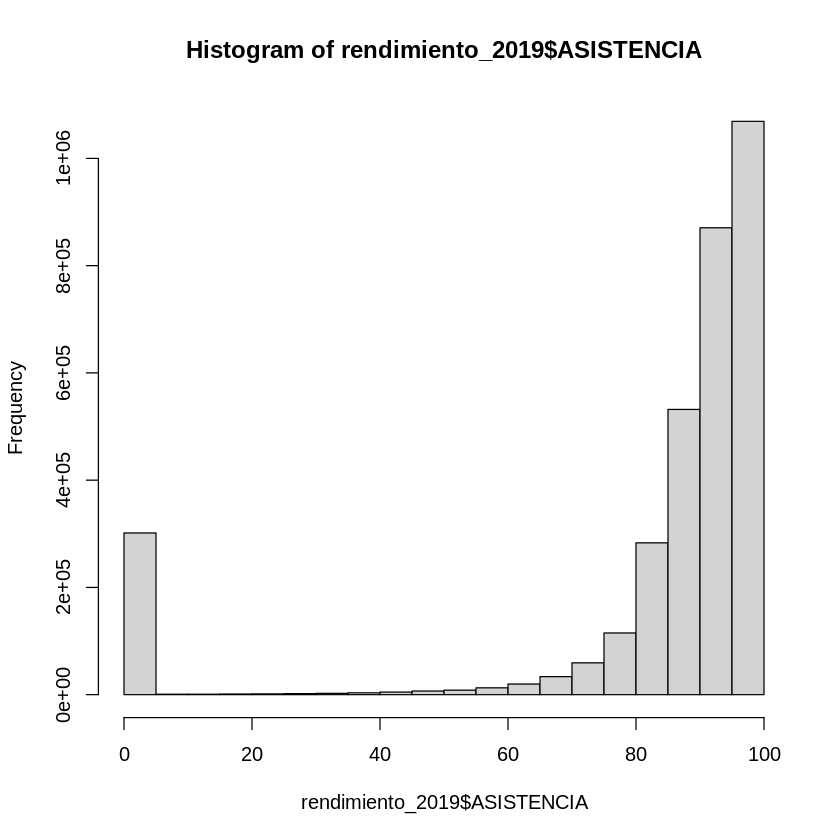

In [ ]:
hist(rendimiento_2019$ASISTENCIA)

### Unicidad: 
(MRUN, RBD) deberia ser unico (si un alumno se traslada sale en 2 colegios el mismo año)

In [ ]:
tabla <- rendimiento_2019%>% group_by(MRUN,RBD)%>%
                    mutate(n=n())%>%
                    filter(n>1)

In [ ]:
tabla %>% arrange(MRUN,RBD)



AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,⋯,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN,n
<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<chr>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
2019,7632,5,ESCUELA N 10 ANGELMO,10,LAGOS,101,10101,PUERTO MONTT,101,⋯,PUERTO MONTT,0,0,0,0.0,0,Y,T,0,2
2019,7632,5,ESCUELA N 10 ANGELMO,10,LAGOS,101,10101,PUERTO MONTT,101,⋯,PUERTO MONTT,0,0,0,5.8,73,P,P,0,2
2019,25065,1,COLEGIO PEDRO DE VALDIVIA -PEÑALOLEN,13,RM,131,13122,PEÑALOLÉN,133,⋯,SANTIAGO,0,0,0,6.1,95,P,P,0,2
2019,25065,1,COLEGIO PEDRO DE VALDIVIA -PEÑALOLEN,13,RM,131,13122,PEÑALOLÉN,133,⋯,SANTIAGO,0,0,0,0.0,0,Y,T,0,2
2019,1206,8,C.E.I.A DR. OSVALDO ROJAS GONZALEZ,5,VALPO,53,5301,LOS ANDES,52,⋯,LOS ANDES,0,0,0,0.0,0,Y,T,0,2
2019,1206,8,C.E.I.A DR. OSVALDO ROJAS GONZALEZ,5,VALPO,53,5301,LOS ANDES,52,⋯,LOS ANDES,500,530,53014,5.5,82,P,P,0,2
2019,25938,1,LICEO DE ADULTOS CEIA DE LA PINTANA,13,RM,131,13112,LA PINTANA,136,⋯,LA PINTANA,0,0,0,3.9,79,R,R,0,2
2019,25938,1,LICEO DE ADULTOS CEIA DE LA PINTANA,13,RM,131,13112,LA PINTANA,136,⋯,LA PINTANA,0,0,0,0.0,0,Y,T,0,2
2019,40414,4,CENTRO EDUC.DE INTEGRAC.DE ADULTOS NEWEN,5,VALPO,56,5605,EL TABO,54,⋯,EL TABO,0,0,0,5.4,60,P,P,0,2


### Permanencia o dominio
Veremos el ESTADO_ESTAB que nos dice en que estado se encuentra un colegio, hay 4 opciones:

* 1: Funcionando
* 2: En receso
* 3: Cerrado
* 4: Autorizado sin matrícula


In [ ]:
rendimiento_2019 %>% group_by(ESTADO_ESTAB)%>%
                      count()

ESTADO_ESTAB,n
<int>,<int>
1,3323275
2,14
3,5626


##c)

###COD_DEPE y COD_DEPE2

In [ ]:
rendimiento_2019 %>% group_by(COD_DEPE, COD_DEPE2)%>%
                      count()

COD_DEPE,COD_DEPE2,n
<int>,<int>,<int>
1,1,396741
2,1,771562
3,2,1716779
4,3,290531
5,4,47706
6,5,105596


Tiene sentido porque los municipales se dividen en corporaciones y municipal DAEM

### SIT_FIN y SIT_FIN_R



In [ ]:
rendimiento_2019 %>% group_by(SIT_FIN, SIT_FIN_R)%>%
                      count()

SIT_FIN,SIT_FIN_R,n
<chr>,<chr>,<int>
P,P,2929757
R,R,98255
R,T,14
Y,T,218730
Y,Y,81672
NA,T,42
NA,NA,445


Es complicado entender esto, puede ser correcta la clasificacion pero se deberia explicar de mejor manera en la documentacion.

### COD_REG_RBD y COD_PRO_RBD

In [ ]:
rendimiento_2019 %>% group_by(COD_REG_RBD, COD_PRO_RBD)%>%
                      count()%>%
                      group_by(COD_REG_RBD)%>%
                      count()



COD_REG_RBD,n
<int>,<int>
1,2
2,3
3,3
4,3
5,8
6,3
7,4
8,3
9,2


Corresponde a la cantidad de provincias sin embargo nos deja con el dato que hay una provincia que no tiene ningun colegio.

##**Pregunta 3 (3.5 pts.)**

Finalmente, trabajará con el modelo de datos y unirá la tabla de rendimiento 2019 con la matrícula de educación superior 2020, para realizar un trabajo exhaustivo de análisis. Para esto usted debe usar RSQLite y los comandos para cargar datos, además de realizar consultas mediante el lenguaje SQL.

**a)** (0.7 pts) Limpie ambas tablas, de acuerdo a lo observado en la pregunta 2, y carguelas a la base de datos, continuando lo hecho en el taller y su modelo de datos.

**b)** (0.8 pts) Analice la validez de los datos, para esto escriba la siguiente consulta:

`Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.`

¿Qué significa el resultado obtenido?

**c)** (2 pts) Realice 2 consultas a la base de datos que involucren a alguna de las entidades de rendimiento y las de matricula. Explique el objetivo de las consultas, luego presente los resultados graficandolos de manera adecuada y finalice con una pequeña conclusion de su analisis.


#a)
Codigo expropiado a Hans Schlechter

In [ ]:
install.packages("RSQLite")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’




In [ ]:
library(RSQLite)

In [ ]:
system("gdown --id 1dXpk0MP6eXcgzfsFT4fnwjchecMwrNmZ")
system("unzip /content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.zip")
matricula <- read.csv2("20200706_Matrícula_Ed_Superior_2020_PUBL_MRUN.csv")

In [ ]:
alumnos <- matricula[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")] %>% 
            rbind(rendimiento_2019[,c("MRUN", "GEN_ALU", "FEC_NAC_ALU")])
colegios <- rendimiento_2019[, c("RBD", "NOM_COM_RBD", "COD_REG_RBD", "COD_DEPE", "RURAL_RBD", "ESTADO_ESTAB")]
asiste <- rendimiento_2019[, c("RBD", "MRUN", "COD_ENSE", "COD_ENSE2", "COD_GRADO", "COD_JOR", "COD_DES_CUR", "PROM_GRAL", "ASISTENCIA", "SIT_FIN", "SIT_FIN_R" )]

estudia_en <- matricula[,c("MRUN", "cod_inst", "cat_periodo", "rango_edad")] 
cursa <- matricula[,c("MRUN","codigo_unico", "cat_periodo", "rango_edad", "anio_ing_carr_ori", "sem_ing_carr_ori", "anio_ing_carr_act", "sem_ing_carr_act", "forma_ingreso")] 
carrera <- matricula[, c("codigo_unico", "cod_sede", "nomb_sede", "cod_carrera", "nomb_carrera", "modalidad", "jornada", "version", "tipo_plan_carr", "dur_estudio_carr", "dur_proceso_tit", "dur_total_carr", "region_sede", "provincia_sede", "comuna_sede", "nivel_global", "nivel_carrera_1", "nivel_carrera_2", "requisito_ingreso",  "vigencia_carrera", "valor_matricula", "valor_arancel", "codigo_demre", "area_conocimiento", "oecd_area",  "oecd_subarea", "area_carrera_generica", "acreditada_carr", "costo_proceso_titulacion",  "costo_obtencion_titulo_diploma" )]
IES <- matricula[, c("cod_inst","tipo_inst_1", "tipo_inst_2", "tipo_inst_3", "nomb_inst", "acreditada_inst", "acre_inst_desde_hasta", "acre_inst_anio")]
pertenece_a <- matricula[,c( "codigo_unico","cod_inst")]



In [ ]:
# Limpiar eliminando llaves vacíos
alumnos <- alumnos[!is.na(alumnos$MRUN),]
cursa <- cursa[!is.na(cursa$MRUN),]
estudia_en <- estudia_en[!is.na(estudia_en$MRUN),]
asiste <- asiste[!is.na(asiste$MRUN),]

In [ ]:
#Eliminamos información repetida
## La tabla de alumnos tiene observaciones no consistentes entre sí (mismo rut con distintas fechas de nacimiento/sexo), se deja la que presente fecha de nacimiento más reciente. 
alumnos <-  alumnos %>% unique() %>% 
                        group_by(MRUN) %>%
                        arrange(desc(FEC_NAC_ALU), by_group=TRUE) %>%
                        filter(row_number(MRUN) == 1)
            
carrera <- unique(carrera)

IES <- IES %>% unique() %>% 
               group_by(cod_inst) %>%
               filter(row_number(cod_inst) == 1)
colegios <- unique(colegios)
asiste <- unique(asiste)
estudia_en <- unique(estudia_en)
cursa <- unique(cursa)
pertenece_a <- unique(pertenece_a)

**Cargado de BBDD**

In [ ]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")

In [ ]:
dbWriteTable(conn , name = "IES", 
                  value = IES,
                  row.names = FALSE, overwrite = TRUE )

dbWriteTable(conn , name = "alumnos", 
                  value = alumnos,
                  row.names = FALSE, overwrite = TRUE )

dbWriteTable(conn , name = "colegios", 
                  value = colegios,
                  row.names = FALSE, overwrite = TRUE )

dbWriteTable(conn , name = "carrera", 
                  value = carrera,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "estudia_en", 
                  value = estudia_en,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "pertenece_a", 
                  value = pertenece_a,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "asiste", 
                  value = asiste,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "cursa", 
                  value = cursa,
                  row.names = FALSE, overwrite = TRUE)

In [ ]:
dbListTables(conn)


[1] "IES"         "alumnos"     "asiste"      "carrera"     "colegios"   
[6] "cursa"       "estudia_en"  "pertenece_a"

#b)

Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.



In [ ]:
resultado <- dbGetQuery(conn,
                       "SELECT  alumnos.MRUN 
                        FROM alumnos, asiste, estudia_en
                        where alumnos.MRUN==asiste.MRUN AND
                              alumnos.MRUN==estudia_en.MRUN AND
                              asiste.SIT_FIN='R'")

In [ ]:
resultado

MRUN
<int>
14188958
11248329
18641274
2985663
10470989
22714910
20913539
2921244
14869875


In [ ]:
library(dplyr)

In [ ]:
asiste %>% filter(MRUN %in% resultado$MRUN)

RBD,MRUN,COD_ENSE,COD_ENSE2,COD_GRADO,COD_JOR,COD_DES_CUR,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
280,14188958,463,8,3,4,1,2.0,50,R,R
1884,11248329,463,8,3,4,1,4.0,63,R,R
3443,18641274,310,5,3,3,0,4.0,79,R,R
6572,2985663,363,6,3,4,0,2.3,99,R,R
8748,10470989,310,5,4,1,0,6.9,56,R,R
10900,22714910,310,5,4,3,0,5.2,77,R,R
11417,20913539,363,6,3,4,0,2.4,10,R,R
12632,2921244,363,6,3,4,0,5.9,69,R,R
14379,14869875,310,5,4,3,0,5.3,84,R,R


In [ ]:
estudia_en %>% filter(MRUN %in% resultado$MRUN)

MRUN,cod_inst,cat_periodo,rango_edad
<int>,<int>,<int>,<chr>
2921244,430,2020,40 y más años
2985663,280,2020,30 a 34 años
6977560,84,2020,20 a 24 años
10470989,23,2020,15 a 19 años
10780617,123,2020,15 a 19 años
11217036,260,2020,20 a 24 años
11248329,20,2020,20 a 24 años
12079519,111,2020,25 a 29 años
14188958,143,2020,25 a 29 años


##c) 
Consulta:

Promedio del colegio del alumno que entra a cada institucion


In [ ]:
resultado <- dbGetQuery(conn,
                       "SELECT  IES.nomb_inst,
                                COUNT(alumnos.MRUN) as N,
                                AVG(asiste.PROM_GRAL) as prom
                        FROM IES, estudia_en, alumnos, asiste
                        where IES.cod_inst==estudia_en.cod_inst  AND
                              estudia_en.MRUN==alumnos.MRUN AND
                              alumnos.MRUN==asiste.MRUN 
                        group by IES.nomb_inst
                        order by prom DESC
                              ")

In [ ]:
resultado

nomb_inst,prom
<chr>,<dbl>
PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,6.578618
UNIVERSIDAD DE CHILE,6.485606
IP DE ARTES ESCENICAS KAREN CONNOLLY,6.400000
UNIVERSIDAD DE LOS ANDES,6.374175
UNIVERSIDAD DE CONCEPCION,6.360535
UNIVERSIDAD ADOLFO IBAÑEZ,6.339645
UNIVERSIDAD DE TALCA,6.321161
UNIVERSIDAD DE SANTIAGO DE CHILE,6.289144
UNIVERSIDAD CATOLICA DEL MAULE,6.195513


## consulta
Cantidad de cambios de region entre colegio e IES

In [ ]:
resultado <- dbGetQuery(conn,
                       "SELECT  carrera.region_sede,
                                colegios.COD_REG_RBD,
                                COUNT(alumnos.MRUN) as N
                        FROM carrera, cursa, alumnos, asiste, colegios
                        where carrera.codigo_unico==cursa.codigo_unico AND
                              cursa.MRUN==alumnos.MRUN AND
                              alumnos.MRUN==asiste.MRUN AND
                              asiste.RBD=colegios.RBD
                        group by carrera.region_sede, colegios.COD_REG_RBD
                              ")

In [ ]:
resultado

region_sede,COD_REG_RBD,N
<chr>,<int>,<int>
Antofagasta,1,59
Antofagasta,2,3946
Antofagasta,3,41
Antofagasta,4,72
Antofagasta,5,12
Antofagasta,6,7
Antofagasta,7,6
Antofagasta,8,3
Antofagasta,9,4


In [ ]:
pivot_wider(
  resultado,
  names_from = COD_REG_RBD,
  values_from = N
)

region_sede,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Antofagasta,59,3946,41,72,12,7,6,3,4,1,1,2,31,2,18,4
Arica y Parinacota,64,60,6,9,5,1,1,1,2,NA,NA,NA,7,2,1760,3
Atacama,2,18,1518,42,13,2,1,NA,2,1,1,NA,7,NA,2,NA
Aysén,1,NA,NA,NA,1,1,2,1,2,11,484,2,4,1,NA,NA
Biobío,36,62,21,40,50,94,313,10155,357,166,53,40,149,29,22,788
Coquimbo,17,156,458,4866,21,10,2,3,6,2,3,2,44,2,8,4
La Araucanía,5,10,4,18,12,35,19,165,5751,209,88,26,104,150,2,16
Lib. Gral B. O'Higgins,3,4,NA,7,10,3330,15,2,11,4,NA,1,58,1,2,2
Los Lagos,3,10,2,3,12,8,7,17,21,4491,41,20,49,425,2,6
